In [37]:
import pandas as pd

df = pd.read_csv('/home/codemaster29/Documents/Coding_Stuff/FlightWise/Models/data_set/Clean_Dataset.csv')
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [39]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [40]:
df.source_city.value_counts()


source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [41]:
df.destination_city.value_counts()


destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [42]:
df.departure_time.value_counts()



departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [43]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [44]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [45]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [46]:
df['duration']


0          2.17
1          2.33
2          2.17
3          2.25
4          2.33
          ...  
300148    10.08
300149    10.42
300150    13.83
300151    10.00
300152    10.08
Name: duration, Length: 300153, dtype: float64

In [47]:
print('duration minumum:',df['duration'].min())
print('duration maximum:',df['duration'].max())
print('duration median:',df['duration'].median())

duration minumum: 0.83
duration maximum: 49.83
duration median: 11.25


## Processing


In [48]:
df.drop('Unnamed: 0',axis=1)
df.drop('flight',axis=1)

df['class'] = df['class'].apply(lambda x: 1 if x == 'Economy' else 0)

In [49]:
df.stops = pd.factorize(df.stops)[0]

In [50]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,1,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,1,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,1,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,1,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,1,Evening,Hyderabad,0,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,1,Night,Hyderabad,0,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,1,Night,Hyderabad,0,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,1,Evening,Hyderabad,0,10.00,49,81585


In [51]:
df = df.join(pd.get_dummies(df.airline, prefix='airline')).drop('airline',axis=1)
df = df.join(pd.get_dummies(df.source_city,prefix='source')).drop('source_city',axis=1)
df = df.join(pd.get_dummies(df.destination_city,prefix='destination')).drop('destination_city',axis=1)
df = df.join(pd.get_dummies(df.arrival_time,prefix='arival')).drop('arrival_time',axis=1)
df = df.join(pd.get_dummies(df.departure_time,prefix='departure')).drop('departure_time',axis=1)

In [52]:
df

,Unnamed: 0,flight,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,...,arival_Evening,arival_Late_Night,arival_Morning,arival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,SG-8709,0,1,2.17,1,5953,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1,1,SG-8157,0,1,2.33,1,5953,False,False,False,...,False,False,True,False,False,True,False,False,False,False
2,2,I5-764,0,1,2.17,1,5956,True,False,False,...,False,False,False,False,False,True,False,False,False,False
3,3,UK-995,0,1,2.25,1,5955,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,4,UK-963,0,1,2.33,1,5955,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,UK-822,1,0,10.08,49,69265,False,False,False,...,True,False,False,False,False,False,False,False,True,False
300149,300149,UK-826,1,0,10.42,49,77105,False,False,False,...,False,False,False,True,True,False,False,False,False,False
300150,300150,UK-832,1,0,13.83,49,79099,False,False,False,...,False,False,False,True,False,True,False,False,False,False
300151,300151,UK-828,1,0,10.00,49,81585,False,False,False,...,True,False,False,False,False,True,False,False,False,False


In [53]:
# Convert only boolean columns to integers (0 and 1)
bool_columns = df.select_dtypes(include='bool').columns
df[bool_columns] = df[bool_columns].astype(int)

# Verify the result
print(df.head())



   Unnamed: 0   flight  stops  class  duration  days_left  price  \
0           0  SG-8709      0      1      2.17          1   5953   
1           1  SG-8157      0      1      2.33          1   5953   
2           2   I5-764      0      1      2.17          1   5956   
3           3   UK-995      0      1      2.25          1   5955   
4           4   UK-963      0      1      2.33          1   5955   

   airline_AirAsia  airline_Air_India  airline_GO_FIRST  ...  arival_Evening  \
0                0                  0                 0  ...               0   
1                0                  0                 0  ...               0   
2                1                  0                 0  ...               0   
3                0                  0                 0  ...               0   
4                0                  0                 0  ...               0   

   arival_Late_Night  arival_Morning  arival_Night  departure_Afternoon  \
0                  0               

In [54]:
df

,Unnamed: 0,flight,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,...,arival_Evening,arival_Late_Night,arival_Morning,arival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,SG-8709,0,1,2.17,1,5953,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,1,SG-8157,0,1,2.33,1,5953,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,2,I5-764,0,1,2.17,1,5956,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3,UK-995,0,1,2.25,1,5955,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,UK-963,0,1,2.33,1,5955,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,UK-822,1,0,10.08,49,69265,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,300149,UK-826,1,0,10.42,49,77105,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,300150,UK-832,1,0,13.83,49,79099,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,300151,UK-828,1,0,10.00,49,81585,0,0,0,...,1,0,0,0,0,1,0,0,0,0


## Training Regression Model

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X, y = df.drop('price', axis=1), df.price
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Apply OneHotEncoder to categorical columns
categorical_columns = X_train.select_dtypes(include='object').columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)],
    remainder='passthrough'  # Keep non-categorical columns as-is
)

X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)  # Applies the same encoding

# Fit the model
reg = RandomForestRegressor(n_jobs=-1)
reg.fit(X_train_encoded, y_train)


RandomForestRegressor(n_jobs=-1)

In [59]:
# Convert categorical columns to numeric using one-hot encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Align the columns of X_train and X_test
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Now you should be able to evaluate your model
reg.score(X_test, y_test)


/home/codemaster29/miniconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


0.9049291397263073

In [60]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(X_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE', math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9049291397263073
MAE: 3793.6794434542157
MSE: 48923375.824707106
RMSE 6994.524703273776


/home/codemaster29/miniconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


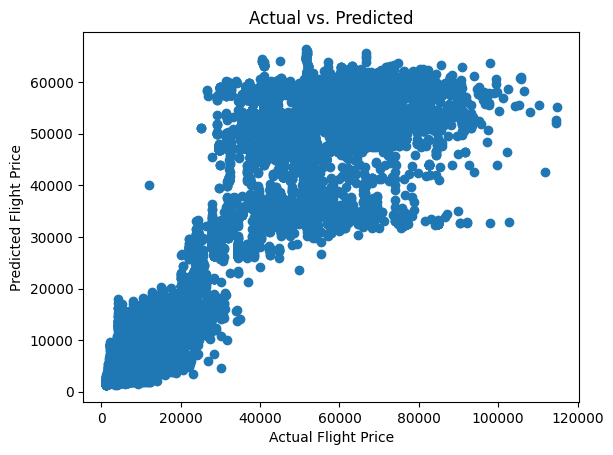

In [61]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Actual vs. Predicted')
plt.show()

In [62]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [64]:
# Manually assign feature names based on X_train columns
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'feature_{i}' for i in range(X_train.shape[1])]

importance = dict(zip(feature_names, reg.feature_importances_))
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

sorted_importance


[('Unnamed: 0', 0.7631612971490526),
 ('class', 0.13199074143620368),
 ('duration', 0.04617260098705743),
 ('flight', 0.027274650474121854),
 ('days_left', 0.013853086890569175),
 ('destination_Hyderabad', 0.0023916034042168184),
 ('stops', 0.0017047892436297632),
 ('destination_Kolkata', 0.0015662897501730604),
 ('destination_Bangalore', 0.0011454975236198338),
 ('destination_Delhi', 0.001103867085996219),
 ('departure_Morning', 0.0007338183588382882),
 ('airline_Air_India', 0.0007138666878362551),
 ('source_Mumbai', 0.0007062893723660637),
 ('destination_Chennai', 0.000706017005142948),
 ('arival_Evening', 0.000636821887813665),
 ('departure_Evening', 0.0006361878167248396),
 ('arival_Night', 0.0006008105604257023),
 ('destination_Mumbai', 0.0005662386286492913),
 ('departure_Early_Morning', 0.0004952164127283552),
 ('source_Bangalore', 0.0004711517398253454),
 ('airline_AirAsia', 0.0004256721932772286),
 ('departure_Afternoon', 0.00042383190606732485),
 ('arival_Afternoon', 0.000415

In [65]:
df.days_left.describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

<BarContainer object of 5 artists>

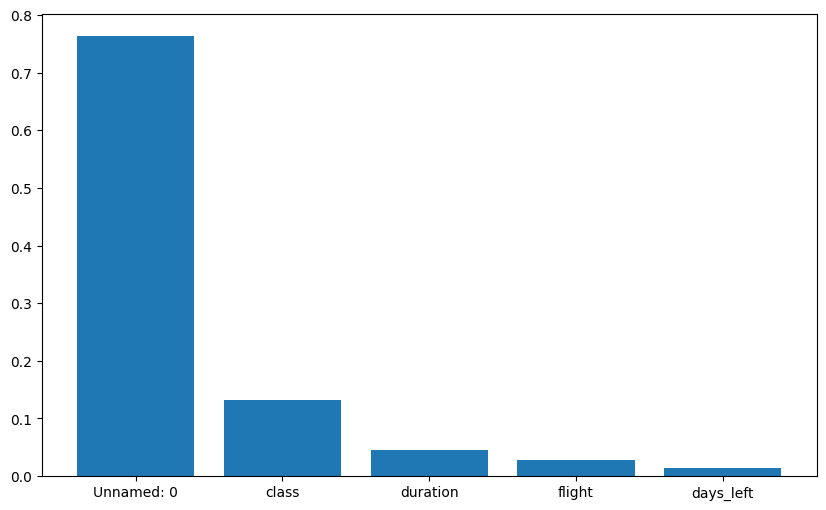

In [66]:
plt.figure(figsize=(10, 6))
plt.bar([x[0] for x in sorted_importance[:5]], [x[1] for x in sorted_importance[:5]])

In [71]:
from sklearn.model_selection import GridSearchCV

reg = RandomForestRegressor(n_jobs=-1)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

KeyboardInterrupt: 

In [70]:
from cuml.ensemble import RandomForestRegressor as cuRF
from sklearn.model_selection import GridSearchCV

# Initialize the CuML RandomForestRegressor
reg = cuRF(n_streams=1)

# Define your parameter grid (some parameters might differ slightly in CuML)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV with CuML regressor
grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_


ModuleNotFoundError: No module named 'cuml'